<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/QuartileTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
slope = pd.read_excel('/content/drive/MyDrive/Thesis Project Kidney/Assign/Assign 3: Re-CountSlope & Quartile/LabSlope.xlsx')
slope.head()

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes
0,2299,3640924,66.8,2016-11-11 09:40:06.053,87,NaN
1,2299,4020970,67.2,2017-03-31 10:18:54.363,140,0.002857
2,2299,4286612,69.2,2017-07-05 10:40:40.763,96,0.020833
3,2299,4546471,63.6,2017-10-03 09:19:54.710,89,-0.062921
4,2299,4801938,58.4,2018-01-04 09:03:28.847,92,-0.056522


In [3]:
slope.isnull().any()

PatientUID         False
PatientVisitUID    False
ResultValue        False
datetime           False
TimeDiff           False
Slopes              True
dtype: bool

In [4]:
import pandas as pd

# Assuming your data is in the 'slope' DataFrame
# Replace 'your_data.csv' with the path to your data file if reading from a CSV file.
# slope = pd.read_csv('your_data.csv')

# Step 1: Calculate the fixed median
fixed_median = 0

# Step 2: Sort the 'slopes' column
slope_sorted = slope.sort_values(by='Slopes')

# Step 3: Divide the sorted 'slopes' column into quartiles
quartile_1 = slope_sorted['Slopes'].quantile(0.25)
quartile_2 = slope_sorted['Slopes'].quantile(0.5)  # Median
quartile_3 = slope_sorted['Slopes'].quantile(0.75)

# Step 4: Create a new column to store the quartile group information
def assign_quartile_group(slope_val):
    if slope_val <= quartile_1:
        return 'Q1'
    elif slope_val <= quartile_2:
        return 'Q2'
    elif slope_val <= quartile_3:
        return 'Q3'
    else:
        return 'Q4'

slope['quartile_group'] = slope['Slopes'].apply(assign_quartile_group)

# Output the updated DataFrame
slope


,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes,quartile_group
0,2299,3640924,66.80,2016-11-11 09:40:06.053,87,NaN,Q4
1,2299,4020970,67.20,2017-03-31 10:18:54.363,140,0.002857,Q3
2,2299,4286612,69.20,2017-07-05 10:40:40.763,96,0.020833,Q3
3,2299,4546471,63.60,2017-10-03 09:19:54.710,89,-0.062921,Q2
4,2299,4801938,58.40,2018-01-04 09:03:28.847,92,-0.056522,Q2
...,...,...,...,...,...,...,...
280094,3409733,10435209,49.13,2023-03-02 09:24:57.310,83,-0.208313,Q1
280095,3432056,10235244,48.51,2023-01-09 12:31:53.220,25,0.168400,Q4
280096,3432056,10306813,67.71,2023-01-27 12:22:43.000,17,1.129412,Q4
280097,3432056,10408954,68.69,2023-02-24 21:05:12.747,28,0.035000,Q3


# **Force Median By change the slope value**


In [5]:
a = slope.copy()

# Step 1: Calculate the fixed median
fixed_median = 0

# Step 2: Calculate the difference between the fixed median and the current median
current_median = a['Slopes'].median()
median_difference = fixed_median - current_median

# Step 3: Adjust the 'Slopes' column by adding the median difference
a['Slopes'] = a['Slopes'] + median_difference

# Now you can work with the adjusted 'a' DataFrame
a

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes,quartile_group
0,2299,3640924,66.80,2016-11-11 09:40:06.053,87,NaN,Q4
1,2299,4020970,67.20,2017-03-31 10:18:54.363,140,0.005779,Q3
2,2299,4286612,69.20,2017-07-05 10:40:40.763,96,0.023755,Q3
3,2299,4546471,63.60,2017-10-03 09:19:54.710,89,-0.059999,Q2
4,2299,4801938,58.40,2018-01-04 09:03:28.847,92,-0.053600,Q2
...,...,...,...,...,...,...,...
280094,3409733,10435209,49.13,2023-03-02 09:24:57.310,83,-0.205391,Q1
280095,3432056,10235244,48.51,2023-01-09 12:31:53.220,25,0.171322,Q4
280096,3432056,10306813,67.71,2023-01-27 12:22:43.000,17,1.132334,Q4
280097,3432056,10408954,68.69,2023-02-24 21:05:12.747,28,0.037922,Q3


In [6]:
a['Slopes'].median()

0.0

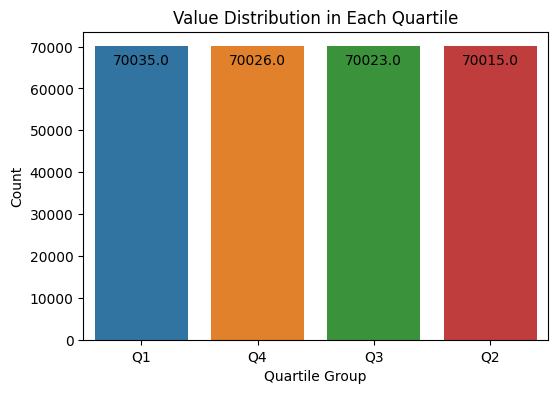

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated the 'quartile_group' column in the 'slope' DataFrame

# Step 1: Group the data by the 'quartile_group' and count the number of occurrences in each group
quartile_counts = a['quartile_group'].value_counts()

# Step 2: Create a bar plot to visualize the quartile distribution with actual counts on top of each bar
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=quartile_counts.index, y=quartile_counts.values)
plt.xlabel('Quartile Group')
plt.ylabel('Count')
plt.title('Value Distribution in Each Quartile')

# Display the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -10), textcoords='offset points')

plt.show()

In [8]:
import pandas as pd

# Assuming you have already calculated the 'quartile_group' column in the 'slope' DataFrame

# Step 1: Group the data by the 'quartile_group'
grouped = a.groupby('quartile_group')

# Step 2: Calculate the minimum and maximum values in each group
min_max_values = grouped['Slopes'].agg(['min', 'max'])

# Output the minimum and maximum values in each quartile group
min_max_values

,min,max
quartile_group,,
Q1,-13.097078,-0.063745
Q2,-0.063745,0.000000
Q3,0.000002,0.066700
Q4,0.066702,29.702922


In [9]:
quartile = a[['PatientUID','PatientVisitUID','ResultValue','datetime','Slopes','TimeDiff','quartile_group']]
quartile

,PatientUID,PatientVisitUID,ResultValue,datetime,Slopes,TimeDiff,quartile_group
0,2299,3640924,66.80,2016-11-11 09:40:06.053,NaN,87,Q4
1,2299,4020970,67.20,2017-03-31 10:18:54.363,0.005779,140,Q3
2,2299,4286612,69.20,2017-07-05 10:40:40.763,0.023755,96,Q3
3,2299,4546471,63.60,2017-10-03 09:19:54.710,-0.059999,89,Q2
4,2299,4801938,58.40,2018-01-04 09:03:28.847,-0.053600,92,Q2
...,...,...,...,...,...,...,...
280094,3409733,10435209,49.13,2023-03-02 09:24:57.310,-0.205391,83,Q1
280095,3432056,10235244,48.51,2023-01-09 12:31:53.220,0.171322,25,Q4
280096,3432056,10306813,67.71,2023-01-27 12:22:43.000,1.132334,17,Q4
280097,3432056,10408954,68.69,2023-02-24 21:05:12.747,0.037922,28,Q3


In [10]:
quartile.to_excel("Quartile.xlsx", index=False)

##**check**

In [11]:
a[a['Slopes'] == float('inf')]

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes,quartile_group


In [12]:
a[a['Slopes'].isnull()]

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes,quartile_group
0,2299,3640924,66.8,2016-11-11 09:40:06.053,87,NaN,Q4


In [13]:
a['PatientUID'].nunique()

17711

# **applying an offset to each slope value**

    another way to forced median = 0

In [14]:
import pandas as pd
slope = pd.read_excel('/content/drive/MyDrive/Thesis Project Kidney/Assign/Assign 3: Re-CountSlope & Quartile/LabSlope.xlsx')
slope.head()

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes
0,2299,3640924,66.8,2016-11-11 09:40:06.053,87,NaN
1,2299,4020970,67.2,2017-03-31 10:18:54.363,140,0.002857
2,2299,4286612,69.2,2017-07-05 10:40:40.763,96,0.020833
3,2299,4546471,63.6,2017-10-03 09:19:54.710,89,-0.062921
4,2299,4801938,58.4,2018-01-04 09:03:28.847,92,-0.056522


In [20]:
import pandas as pd

# Assuming your data is in the 'slope' DataFrame
# Replace 'your_data.csv' with the path to your data file if reading from a CSV file.
# slope = pd.read_csv('your_data.csv')

# Step 1: Calculate the fixed median
fixed_median = 0

# Step 2: Sort the 'slopes' column
slope_sorted = slope.sort_values(by='Slopes')

# Step 3: Divide the sorted 'slopes' column into quartiles
quartile_1 = slope_sorted['Slopes'].quantile(0.25)
quartile_2 = slope_sorted['Slopes'].quantile(0.5)  # Median
quartile_3 = slope_sorted['Slopes'].quantile(0.75)

# Step 4: Create a new column to store the quartile group information
def assign_quartile_group(slope_val):
    if slope_val <= quartile_1:
        return 'Q1'
    elif slope_val <= quartile_2:
        return 'Q2'
    elif slope_val <= quartile_3:
        return 'Q3'
    else:
        return 'Q4'

slope['quartile_group'] = slope['Slopes'].apply(assign_quartile_group)

# Output the updated DataFrame
slope

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes,quartile_group
0,2299,3640924,66.80,2016-11-11 09:40:06.053,87,NaN,Q4
1,2299,4020970,67.20,2017-03-31 10:18:54.363,140,0.005779,Q3
2,2299,4286612,69.20,2017-07-05 10:40:40.763,96,0.023755,Q3
3,2299,4546471,63.60,2017-10-03 09:19:54.710,89,-0.059999,Q2
4,2299,4801938,58.40,2018-01-04 09:03:28.847,92,-0.053600,Q2
...,...,...,...,...,...,...,...
280094,3409733,10435209,49.13,2023-03-02 09:24:57.310,83,-0.205391,Q1
280095,3432056,10235244,48.51,2023-01-09 12:31:53.220,25,0.171322,Q4
280096,3432056,10306813,67.71,2023-01-27 12:22:43.000,17,1.132334,Q4
280097,3432056,10408954,68.69,2023-02-24 21:05:12.747,28,0.037922,Q3


In [22]:
# Calculate the current median
current_median = slope['Slopes'].median()

# Calculate the offset needed to force the median to be 0
offset = -current_median

# Apply the offset to all slope values
slope['Slopes'] = slope['Slopes'] + offset

slope

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes,quartile_group
0,2299,3640924,66.80,2016-11-11 09:40:06.053,87,NaN,Q4
1,2299,4020970,67.20,2017-03-31 10:18:54.363,140,0.005779,Q3
2,2299,4286612,69.20,2017-07-05 10:40:40.763,96,0.023755,Q3
3,2299,4546471,63.60,2017-10-03 09:19:54.710,89,-0.059999,Q2
4,2299,4801938,58.40,2018-01-04 09:03:28.847,92,-0.053600,Q2
...,...,...,...,...,...,...,...
280094,3409733,10435209,49.13,2023-03-02 09:24:57.310,83,-0.205391,Q1
280095,3432056,10235244,48.51,2023-01-09 12:31:53.220,25,0.171322,Q4
280096,3432056,10306813,67.71,2023-01-27 12:22:43.000,17,1.132334,Q4
280097,3432056,10408954,68.69,2023-02-24 21:05:12.747,28,0.037922,Q3


In [27]:
offset

-0.0

In [23]:
print("New Median:", slope['Slopes'].median())

New Median: 0.0


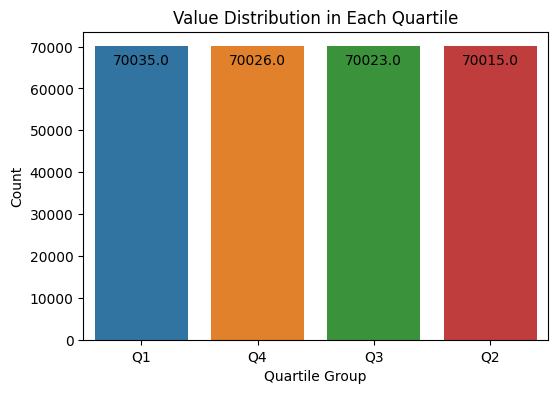

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated the 'quartile_group' column in the 'slope' DataFrame

# Step 1: Group the data by the 'quartile_group' and count the number of occurrences in each group
quartile_counts = slope['quartile_group'].value_counts()

# Step 2: Create a bar plot to visualize the quartile distribution with actual counts on top of each bar
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=quartile_counts.index, y=quartile_counts.values)
plt.xlabel('Quartile Group')
plt.ylabel('Count')
plt.title('Value Distribution in Each Quartile')

# Display the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -10), textcoords='offset points')

plt.show()

In [26]:
import pandas as pd

# Assuming you have already calculated the 'quartile_group' column in the 'slope' DataFrame

# Step 1: Group the data by the 'quartile_group'
grouped = slope.groupby('quartile_group')

# Step 2: Calculate the minimum and maximum values in each group
min_max_values = grouped['Slopes'].agg(['min', 'max'])

# Output the minimum and maximum values in each quartile group
min_max_values

,min,max
quartile_group,,
Q1,-13.097078,-0.063745
Q2,-0.063745,0.000000
Q3,0.000002,0.066700
Q4,0.066702,29.702922
